In [ ]:
%pwd
%cd ../..

In [ ]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [ ]:
# fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [ ]:
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/{problem_name}_surface_and_contour-autumn.png'
# )

In [ ]:
# Run all problems
problem_names = [
    # 'ackley',
    'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    # 'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
    # 'ex8_1_1',
    # # 'ex8_6_2',  # Need to fix threw an error
    # 'kriging_peaks_red010',
    # 'kriging_peaks_red020',
    # 'kriging_peaks_red030',
    # 'kriging_peaks_red050',
    # 'kriging_peaks_red100',
    # 'kriging_peaks_red200',
    # 'kriging_peaks_red500',
    # 'mathopt6',
    # 'quantum',
    # 'rosenbrock',
]

problem_performance = []
trials = 1

for problem_name in problem_names:
    problem = PROBLEMS_BY_NAME[problem_name]
    outputs = run_deeplifting(
        problem,
        trials=trials,
        input_size=1024,
        hidden_sizes=(512, 512, 512, 512),
        activation='leaky_relu',
        agg_function='max',
    )
    results = outputs['final_results']

    # # get the global minimum and the number of hits
    # minimum_value = problem['global_minimum']
    # hit = np.array([np.abs(found_min - minimum_value) for _, _, found_min in results])
    # hits = np.where(hit <= 1e-4, 1, 0).mean()

    # # Create a performance dataframe
    # df = pl.DataFrame(
    #     {
    #         'problem_name': [problem_name] * trials,
    #         'algorithm': ['deeplifting'] * trials,
    #         'hits': hits,
    #     }
    # )
    # problem_performance.append(df)

    # Let's plot the values with UMN colors
    fig = create_optimization_plot(
        problem_name, problem, results, add_contour_plot=True, colormap='OrRd'
    )

In [ ]:
results

In [ ]:
# fig.subplots_adjust(left=0, right=2, bottom=0, top=2)
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/ackley_introduction.png',
#     bbox_inches='tight',
#     pad_inches=-0.1,
# )

In [ ]:
# performance_df = pl.concat(problem_performance, how='vertical')

In [ ]:
# performance_df = (
#     performance_df
#     .groupby(['problem_name'])
#     .agg(pl.col('hits').mean())
#     .rename({'hits': 'success_rate'})
#     .sort('problem_name')
# )

In [ ]:
# performance_df

In [ ]:
problem_name = 'griewank'
problem = PROBLEMS_BY_NAME[problem_name]
problem['bounds'] = [(-3, 3), (-3, 3)]
results = np.array([[0, 0, 0, 0, 0]])

fig = create_optimization_plot(
    problem_name, problem, results, add_contour_plot=True, colormap='OrRd_r'
)

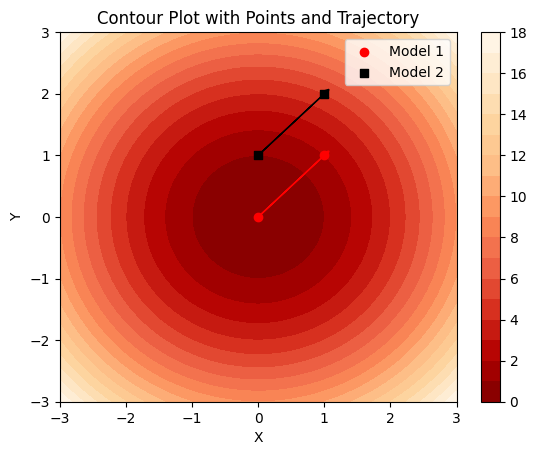

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Your list of lists (models)
points_lists = [[(0, 0), (1, 1)], [(0, 1), (1, 2)]]


# Define the 2D function
def f(x, y):
    return x**2 + y**2


# Create a mesh grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Plot the contour
plt.contour(x, y, z, levels=50, cmap="jet")
plt.colorbar()

# Define colors and markers for the models
colors = ['red', 'blue']
markers = ['o', 's']

# Plot each set of points
for idx, points in enumerate(points_lists):
    x_values, y_values = zip(*points)
    plt.scatter(
        x_values,
        y_values,
        color=colors[idx],
        marker=markers[idx],
        label=f'Model {idx + 1}',
    )

    # Plot arrows for the trajectory
    for i in range(len(points) - 1):
        plt.plot(
            [points[i][0], points[i + 1][0]],
            [points[i][1], points[i + 1][1]],
            color=colors[idx],
            marker='->',
        )

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot with Points and Trajectory')
plt.legend()
plt.show()